In [1]:
from maelzel.core import *
cfg = getConfig()
cfg['show.voiceMaxStaves'] = 2
# cfg['soundfilePlotHeight'] = 2


end of score.		   overall amps:      0.0
	   overall samples out of range:        0
0 errors in performance


‹3F 3A# 4D# 4G# 1♩›
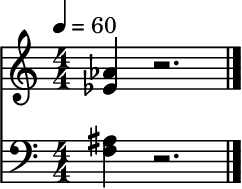

In [2]:
ch = Chord("3f 3A#! 4Eb 4g#")
ch

‹3B 4D# 4G# 1♩›
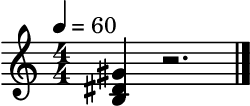

In [3]:
ch = Chord("3B 4Eb 4G#")
ch

Fixing one enharmonic variant alters the spelling of its surroundings 

‹3B 4Eb 4Ab 1♩›
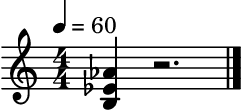

In [4]:
ch = Chord("3B 4Eb! 4G#")
ch

‹3F 3B 4D# 4G# 2♩ f›
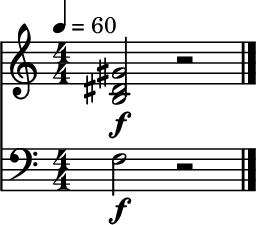

In [5]:
ch = Chord("3f 3b 4d#! 4Ab", dur=2, dynamic='f')
ch

Applying a notehead symbol to a chord modifies all the notes within the chord. To apply a symbol to a specific note in the chord, address the specific note.

‹3F 3B 4D# 4G# 2♩ f›
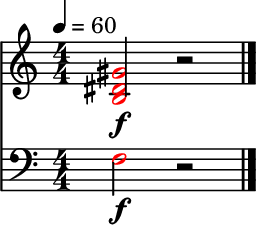

In [6]:
ch.addSymbol(symbols.Notehead(color='red'))
ch

Notice that symbols specific to a note within a chord have a higher priority that those of a chord. In this case, a note of a chord has an added blue symbol and this is retained even if a red symbol is added to the chord as a whole. 

‹3F 3B 4Eb 4Ab 2♩ f›
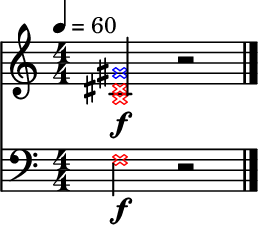

In [7]:
ch = Chord("3f 3b 4d# 4g#", dur=2, dynamic='f')
ch[-1].addSymbol(symbols.Notehead(color='blue'))
ch.addSymbol(symbols.Notehead(color='red'))
ch.addSymbol(symbols.Notehead('x'))
ch

‹3E 3B 4Eb 4Ab 2♩ f›
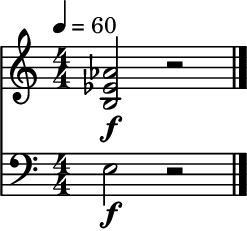

In [8]:
ch = Chord("3e 3b 4Eb! 4g#", dur=2, dynamic='f')

#ch[1].addSymbol(symbols.Notehead(size=0.8))
#ch[2].addSymbol(symbols.Accidental(color='red'))
#ch[2].addSymbol(symbols.Notehead(color='green'))

#ch[-1].addSymbol(symbols.Accidental(parenthesis=True, size=0.9))
#ch.dump()
ch

‹3F 3B 4Eb 4Ab 2♩ gliss=4C,4C#,4E,4F# mf›
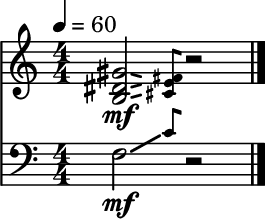

In [9]:
ch = Chord("3f 3b 4D# 4Ab", dur=2, dynamic='mf', gliss='4c 4c# 4E 4Gb')
ch

‹2F 3B 4Eb 4Ab 4♩ gliss=4C,4C#,4E,4F# mf›
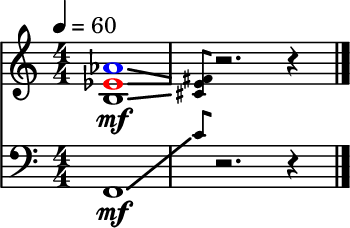

In [10]:
ch = Chord("2f 3b 4D# 4Ab!", dur=4, dynamic='mf', gliss='4c 4c# 4E 4Gb')
ch[-1].addSymbol(symbols.Notehead(color='blue'))
next(n for n in ch.notes if n == '4Eb')
ch.findNote(pitch='4Eb').addSymbol(symbols.Notehead(color='red'))
ch


4D#:1♩:symbols=[Notehead(color=red)]
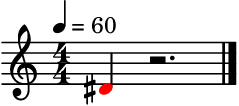

In [11]:
next(n for n in ch.notes if n == '4Eb')

**Individual glissandi are not supported yet**

In the following case, the 3B note has a glissando to 3A, which is not taken into account, neither for notation nor for playback.

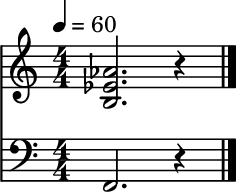

OfflineRenderer(sr=44100)
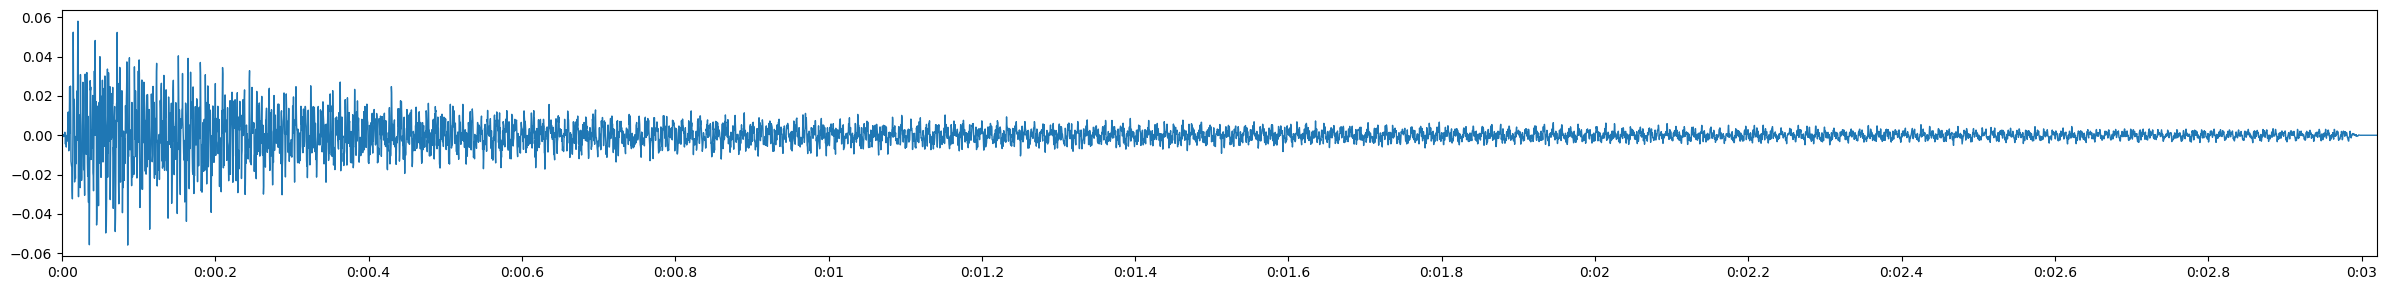

In [12]:
ch = Chord("2f 3b 4D# 4Ab!", dur=3)
ch[1].gliss = '3A'
ch.show()
ch.rec(nchnls=1)


Within tied notes/chords, they must share the same enharmonic spelling. In this case the first pitch of a logical tie determines the spelling, disregarding pinned spellings which might be set later on 

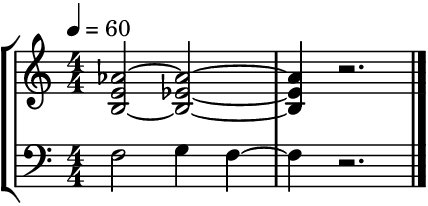

OfflineRenderer(sr=44100)
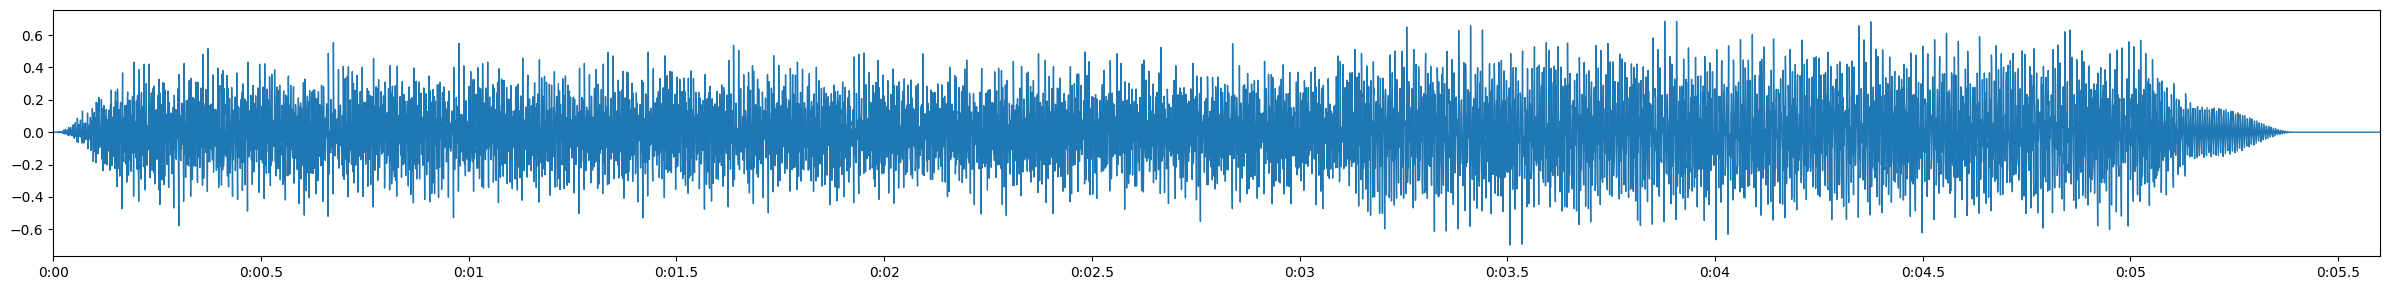

In [17]:
v = Voice([
    Chord("3f 3b 4E 4Ab!", dur=2, tied=True),
    Chord("3g 3b 4D# 4G#", 1, tied=True),
    Chord("3f 3b 4Eb! 4Ab", dur=2, tied=True), 
])
v.show()
v.rec(nchnls=1, instr='saw', kcutoffratio=3, fade=0.2, sustain=0.2)

In [14]:
getPreset("saw")

Preset: saw  (Transposable saw with optional low-pass filtering)
    routing=True
  |ktransp=0.0, klag=0.1, kcutoffratio=0.0, kfilterq=3.0|
  ; Transposable saw with optional low-pass filtering
  ;  Args:
  ;    ktransp: transposition interval
  ;    klag: lag time when modifying pitch
  ;    kcutoffratio: filter cutoff frequency as factor of the osc frequency
  ;    kfilterq: filter resonance
  kfreq = mtof:k(lag(kpitch + ktransp, klag))
  asig = vco2(1, kfreq, 0) * a(kamp)
  aout1 = kcutoffratio == 0 ? asig : K35_lpf(asig, kfreq*kcutoffratio, kfilterq)